<h1>Predicting Crop Yield using Polynomial Regression</h1>

In this case study, we aim to predict crop yield (Yield per acre) based on various agricultural factors such as Rain Fall, Fertilizer usage, Temperature, Nitrogen (N), Phosphorus (P), and Potassium (K). Crop yield prediction is crucial for optimizing agricultural practices and ensuring food security.

**Dataset Description:** The dataset "crop_yield_prediction.csv" contains observations on different agricultural parameters and their corresponding crop yields. Each row represents a set of agricultural conditions and the resulting yield per acre. Here are the columns in the dataset:

-   Rain Fall (mm): Amount of rainfall in millimeters.
-   Fertilizer: Amount of fertilizer used.
-   Temperature: Temperature in Celsius.
-   Nitrogen (N): Nitrogen content.
-   Phosphorus (P): Phosphorus content.
-   Potassium (K): Potassium content.
-   Yield (Q/acre): Crop yield in quantity per acre.

**Choice of Polynomial Regression:** We opt for Polynomial Regression over Linear or Multi Linear Regression for several reasons:

-   **Non-linear Relationships:** Agricultural variables often interact in non-linear ways with crop yield. Polynomial Regression can capture these complex relationships more effectively than linear models.
-   **Flexibility in Model Complexity:** Polynomial Regression allows us to model quadratic, cubic, or higher-order relationships between independent variables and crop yield, providing more accurate predictions.
-   **Improved Accuracy:** By allowing for curvature in the relationship between predictors and yield, Polynomial Regression can potentially offer better accuracy compared to simpler linear models.

## Step 1: Data Preprocessing
First, we need to handle any missing values and prepare the dataset for modeling

In [25]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../Datasets/crop_yield_prediction.csv')

# Display the first few rows and check for missing values
print(data.head())
print(data.isnull().sum())


   Rain Fall (mm)  Fertilizer Temperatue  Nitrogen (N)  Phosphorus (P)  \
0          1230.0        80.0         28          80.0            24.0   
1           480.0        60.0         36          70.0            20.0   
2          1250.0        75.0         29          78.0            22.0   
3           450.0        65.0         35          70.0            19.0   
4          1200.0        80.0         27          79.0            22.0   

   Potassium (K)  Yeild (Q/acre)  
0           20.0            12.0  
1           18.0             8.0  
2           19.0            11.0  
3           18.0             9.0  
4           19.0            11.0  
Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64


## Step 2: Data Cleaning
Ensure the data is clean and ready for modeling. Handle missing values and categorical data.

In [26]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if necessary
data = data.dropna()

# Encode categorical variables
#data = pd.get_dummies(data, drop_first=True)

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64


In [27]:
# Check for missing values
print(data.isnull().sum())

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64


## Step 3: Exploratory Data Analysis (EDA)
Next, let's explore the relationships between variables using visualization.

   Rain Fall (mm)  Fertilizer Temperatue  Nitrogen (N)  Phosphorus (P)  \
0          1230.0        80.0         28          80.0            24.0   
1           480.0        60.0         36          70.0            20.0   
2          1250.0        75.0         29          78.0            22.0   
3           450.0        65.0         35          70.0            19.0   
4          1200.0        80.0         27          79.0            22.0   

   Potassium (K)  Yeild (Q/acre)  
0           20.0            12.0  
1           18.0             8.0  
2           19.0            11.0  
3           18.0             9.0  
4           19.0            11.0  


C:\Users\srini\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srini\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srini\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srini\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

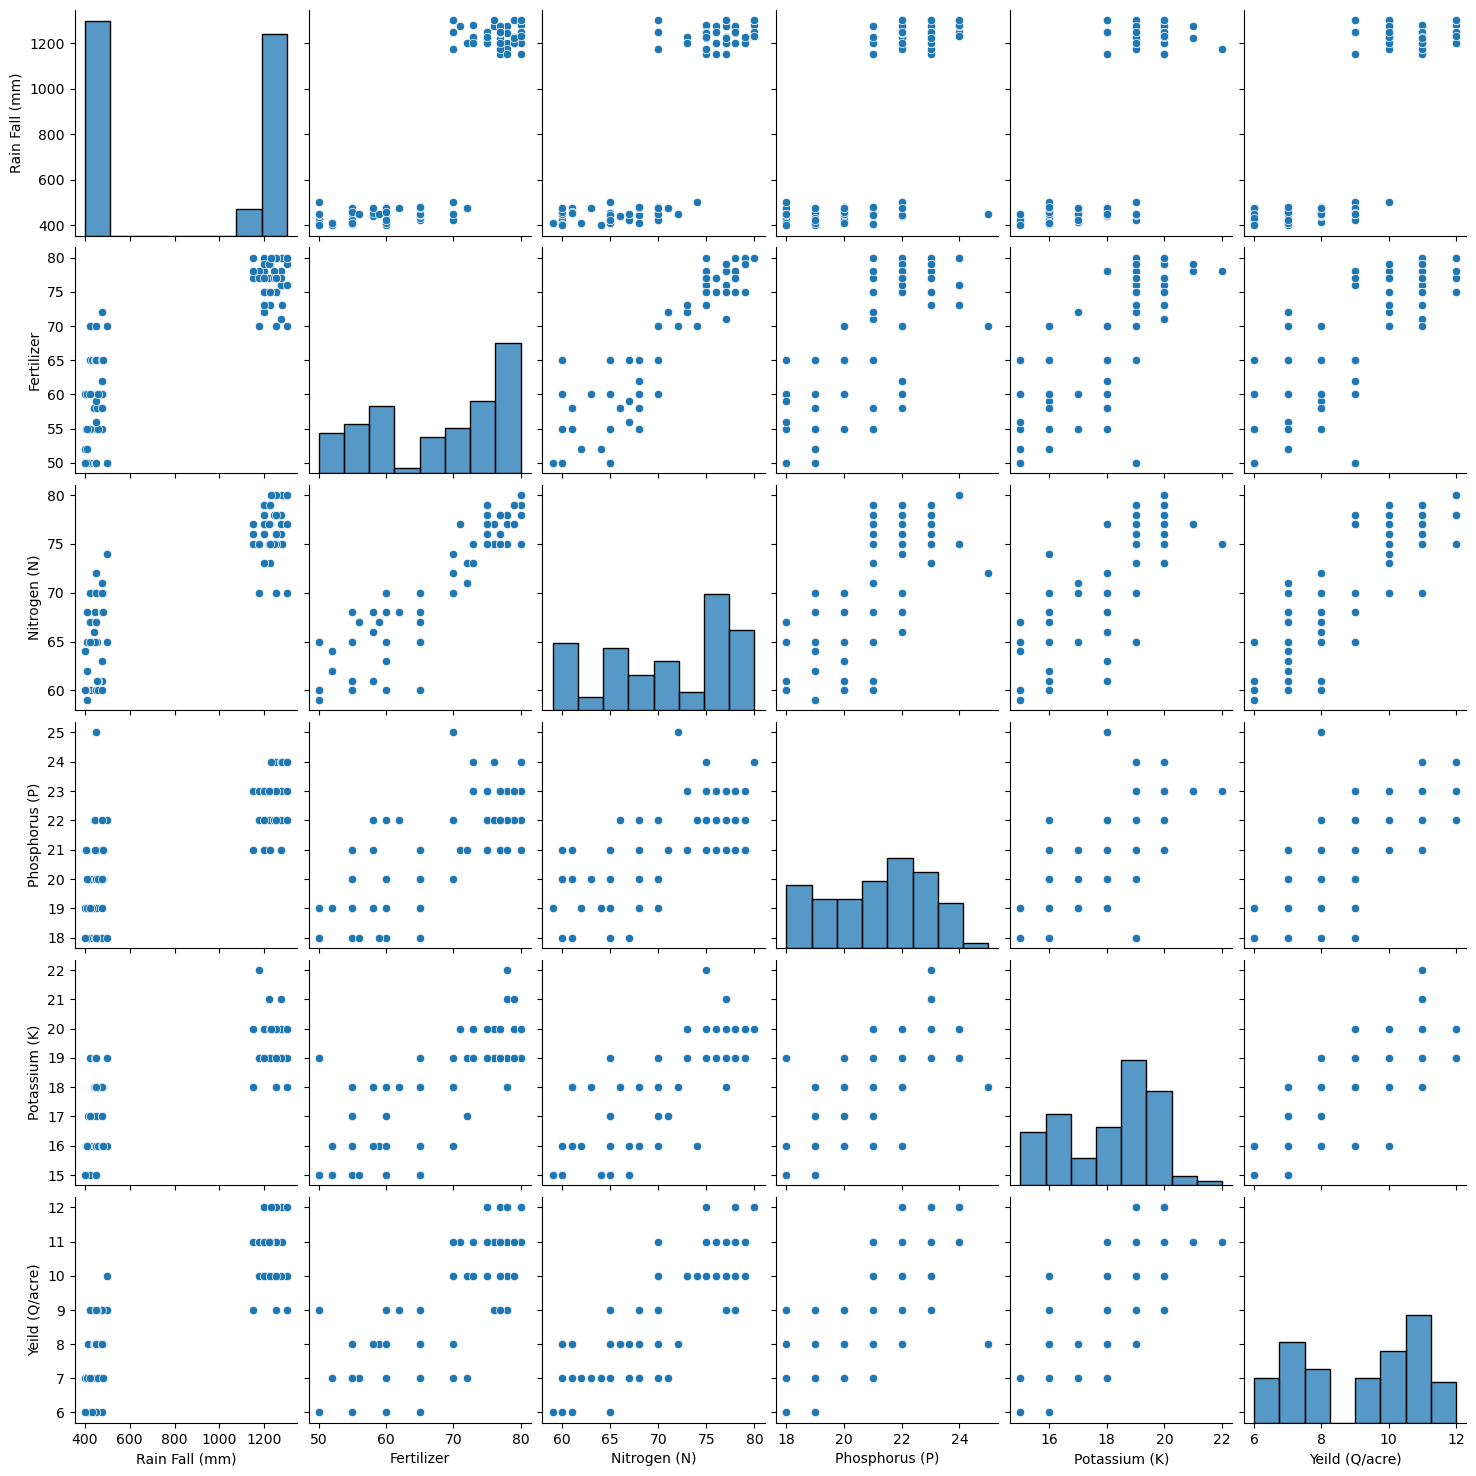

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data.head())
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()


## Step 4: Feature Selection and Preparation
Define the independent variables (X) and the dependent variable (y).

In [29]:
# Define X and y
X =  data.drop(['Yeild (Q/acre)'], axis=1)
y = data['Yeild (Q/acre)']


## Step 5: Polynomial Regression Model
Apply Polynomial Regression using Scikit-Learn.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2

# Create a polynomial regression model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## Step 6: Evaluate the Model
Evaluate the model's performance on the test set.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


MAE: 0.5720796729438007
MSE: 0.6716807537421225
RMSE: 0.8195613178659193
R^2: 0.8520526974136294


## Step 7: Interpret the Results
Interpret the model coefficients and evaluate the significance of each feature.

In [33]:
# Get the model coefficients
coefficients = pd.DataFrame(model.named_steps['linearregression'].coef_, 
                            model.named_steps['polynomialfeatures'].get_feature_names_out(X.columns), 
                            columns=['Coefficient'])

# Display the coefficients
print(coefficients)


                                Coefficient
1                              7.587735e+06
Rain Fall (mm)                -1.916907e-02
Fertilizer                     2.957274e+00
Temperatue                    -3.878695e-01
Nitrogen (N)                  -2.231659e+00
Phosphorus (P)                 1.288464e+00
Potassium (K)                 -2.163433e+00
Rain Fall (mm)^2              -6.713945e-06
Rain Fall (mm) Fertilizer     -6.519358e-04
Rain Fall (mm) Temperatue     -2.485893e-04
Rain Fall (mm) Nitrogen (N)    9.159054e-04
Rain Fall (mm) Phosphorus (P)  1.265143e-03
Rain Fall (mm) Potassium (K)  -5.573026e-04
Fertilizer^2                  -9.536068e-03
Fertilizer Temperatue         -6.043057e-02
Fertilizer Nitrogen (N)       -2.968152e-03
Fertilizer Phosphorus (P)      6.862597e-02
Fertilizer Potassium (K)      -2.226686e-02
Temperatue^2                  -1.280240e-02
Temperatue Nitrogen (N)        5.707089e-02
Temperatue Phosphorus (P)      7.293074e-02
Temperatue Potassium (K)      -1